In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../library/')
from frustration_graph import *
import pickle
import os
import copy

In [2]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

In [3]:
res_path = "../../../Results/Ising_Frustrated/Open/"

L = 20
ratios = np.arange(-1., 0, 0.05)

qpu = DWaveSampler()
sampler = EmbeddingComposite(qpu)

In [4]:
ratios

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05])

## Frustrated Ising without Periodic Conditions

In [5]:
if not os.path.isfile(res_path + "results.pickle"):
    results = []

    for ratio in ratios:
        bqm = bqm_frustration(L, ratio)
        sampleset = sampler.sample(bqm, num_reads=500) #chain_strenght=5
        
        results.append(sampleset)
        
    Magnetizations = []
    Frequencies = []
    Energies = []

    for result in results: 
        M, f, E = [], [], []
        for record in result.record:
            M_mean = np.abs(record[0].mean())
            M.append(M_mean)
            f.append(record[2])
            E.append(record[1])
        Magnetizations.append(M)
        Frequencies.append(f)
        Energies.append(E)

    with open(res_path + "results.pickle", "wb") as file:
        pickle.dump([Magnetizations, Energies, Frequencies] , file)
else:
    with open(res_path + "results.pickle", "rb") as file:
        Magnetizations, Energies, Frequencies = pickle.load(file)

## Creating transition phase graph

In [6]:
Mag = []
Chi = []

for i in range(ratios.size):
    M = np.array(Magnetizations[i])
    F = np.array(Frequencies[i])
    
    M_mean = (M * F).sum() / F.sum()
    C = ((M - M_mean)**2 * F).sum() / F.sum()
    Mag.append(M_mean)
    Chi.append(C)

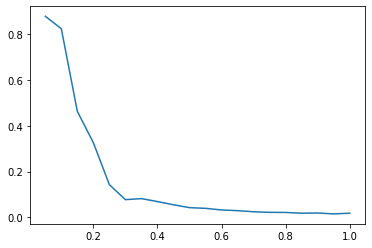

In [7]:
plt.plot(np.abs(ratios), Mag)

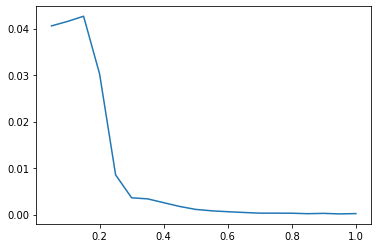

In [8]:
plt.plot(np.abs(ratios), Chi)

In [9]:
L = 20
Lattice_Size = (L, L)
periodic = False

C_G = nx.grid_graph(dim=Lattice_Size, periodic=periodic)

for x in range(1, L-1):
    for y in range(1, L-1):
        # diagonals on right
        x1, y1 = x+1, y+1
        C_G.add_edge((x, y), (x1, y1))
        
        x1, y1 = x-1, y+1
        C_G.add_edge((x, y), (x1, y1))
        
        # diagonals on left
        x1, y1 = x+1, y-1
        C_G.add_edge((x, y), (x1, y1))
        
        x1, y1 = x-1, y-1
        C_G.add_edge((x, y), (x1, y1))

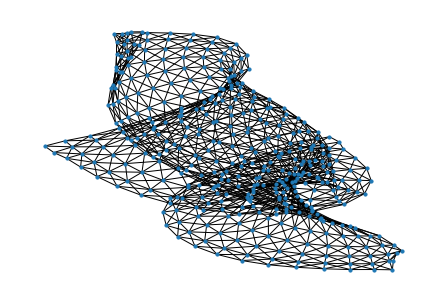

In [10]:
nx.draw(G=C_G, node_size=10)